<a href="https://colab.research.google.com/github/barassah/ml_experiments/blob/main/BERT_Apple_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#loading libraries
import re
import nltk
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Apple-Twitter-Sentiment-DFE.csv to Apple-Twitter-Sentiment-DFE (1).csv


In [ ]:
#reading and describing the dataset
dataset=pd.read_csv("Apple-Twitter-Sentiment-DFE.csv", encoding='ISO-8859-1')
print(dataset)

       _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0     623495513     True      golden                  10               NaN   
1     623495514     True      golden                  12               NaN   
2     623495515     True      golden                  10               NaN   
3     623495516     True      golden                  17               NaN   
4     623495517    False   finalized                   3    12/12/14 12:14   
...         ...      ...         ...                 ...               ...   
3881  623499442     True      golden                  13               NaN   
3882  623499450     True      golden                  16               NaN   
3883  623499486     True      golden                  14               NaN   
3884  623499514     True      golden                  13               NaN   
3885  623517290     True      golden                  17               NaN   

     sentiment  sentiment:confidence                           

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [ ]:
dataset.shape

(3886, 12)

In [ ]:
dataset.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')

In [ ]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
textCount = cv.fit_transform(dataset['text'])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Using textblob to understand review sentiment since, the data was unlabeled
from textblob import Word, TextBlob
dataset['sentiment']=dataset['text'].apply(lambda x: TextBlob(x).sentiment[0])
dataset.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,1.00,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,0.00,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,0.00,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,0.65,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,0.00,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [ ]:
m=dataset.sentiment
np.unique(m)

array([-1.00000000e+00, -9.37500000e-01, -9.00000000e-01, -8.00000000e-01,
       -7.81250000e-01, -7.80000000e-01, -7.50000000e-01, -7.38281250e-01,
       -7.32421875e-01, -7.16666667e-01, -7.14285714e-01, -7.00000000e-01,
       -7.00000000e-01, -7.00000000e-01, -6.66666667e-01, -6.50000000e-01,
       -6.25000000e-01, -6.00000000e-01, -6.00000000e-01, -6.00000000e-01,
       -5.90000000e-01, -5.85937500e-01, -5.83333333e-01, -5.62500000e-01,
       -5.50000000e-01, -5.33333333e-01, -5.25000000e-01, -5.04166667e-01,
       -5.00000000e-01, -5.00000000e-01, -4.83333333e-01, -4.66666667e-01,
       -4.57142857e-01, -4.50000000e-01, -4.50000000e-01, -4.43988715e-01,
       -4.37500000e-01, -4.33333333e-01, -4.27083333e-01, -4.00000000e-01,
       -4.00000000e-01, -4.00000000e-01, -3.96666667e-01, -3.90625000e-01,
       -3.88888889e-01, -3.87500000e-01, -3.77777778e-01, -3.75000000e-01,
       -3.75000000e-01, -3.75000000e-01, -3.72916667e-01, -3.66666667e-01,
       -3.62500000e-01, -

In [ ]:
def categorize_sentiment(value, threshold):
    if value > threshold:
        return '1'
 #   elif value > pos_threshold:
 #       return '2'
    else:
        return '0'

# Example thresholds
#threshold = 0.0  # Adjust as needed
threshold = 0.0   # Adjust as needed

# Categorize sentiment values and store them back in the DataFrame
dataset['polarity'] = dataset['sentiment'].apply(lambda x: categorize_sentiment(x, threshold)

)
print(dataset)

       _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0     623495513     True      golden                  10               NaN   
1     623495514     True      golden                  12               NaN   
2     623495515     True      golden                  10               NaN   
3     623495516     True      golden                  17               NaN   
4     623495517    False   finalized                   3    12/12/14 12:14   
...         ...      ...         ...                 ...               ...   
3881  623499442     True      golden                  13               NaN   
3882  623499450     True      golden                  16               NaN   
3883  623499486     True      golden                  14               NaN   
3884  623499514     True      golden                  13               NaN   
3885  623517290     True      golden                  17               NaN   

      sentiment  sentiment:confidence                          

In [ ]:
dataset['polarity'].value_counts()

,count
polarity,
0,2708
1,1178


In [ ]:
from sklearn.model_selection import train_test_split
# Split into training and validation sets
train_df, val_df = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
from transformers import BertTokenizer
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the text
def tokenize_data(df, max_length=128):
    return tokenizer(
        dataset["text"].tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt",
    )

train_encodings = tokenize_data(train_df)
val_encodings = tokenize_data(val_df)

print("Tokenize Done")

In [ ]:
# Convert labels to tensors
import torch

# Convert polarity values to integers
train_df["polarity"] = pd.to_numeric(train_df["polarity"])
val_df["polarity"] = pd.to_numeric(val_df["polarity"])

# Create tensors
train_labels = torch.tensor(train_df["polarity"].tolist())
val_labels = torch.tensor(val_df["polarity"].tolist())

print(train_labels)
print(val_labels)

In [ ]:
from torch.utils.data import Dataset

class ReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, train_labels)
val_dataset = ReviewDataset(val_encodings, val_labels)

print("Train_val_Dataset Done")

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

print("BERT Model Initialized")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
)

print("Training Done")

Training Done


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

print("Training Done")

Epoch,Training Loss,Validation Loss
1,0.633100,0.622702
2,0.677100,0.625235
3,0.573900,0.623098


TrainOutput(global_step=585, training_loss=0.611969109885713, metrics={'train_runtime': 8185.93, 'train_samples_per_second': 1.139, 'train_steps_per_second': 0.071, 'total_flos': 335404928930400.0, 'train_loss': 0.611969109885713, 'epoch': 3.0})

In [ ]:
results = trainer.evaluate()
print(results)

print("Evaluation Completed")

{'eval_loss': 0.6230977773666382, 'eval_runtime': 189.7823, 'eval_samples_per_second': 4.099, 'eval_steps_per_second': 0.258, 'epoch': 3.0}


**Application of the Model**

In [ ]:
def predict(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    return torch.argmax(probs).item()

# Example prediction
text = "This is a fake review."
prediction = predict(text)
print("Fake" if prediction == 1 else "Genuine")

Genuine


In [ ]:
model.save_pretrained("./fake_review_detection_model")
tokenizer.save_pretrained("./fake_review_detection_model")
print("BERT Model Saved")

('./fake_review_detection_model/tokenizer_config.json',
 './fake_review_detection_model/special_tokens_map.json',
 './fake_review_detection_model/vocab.txt',
 './fake_review_detection_model/added_tokens.json')

In [ ]:
from torch.utils.data import DataLoader
# Create a DataLoader for the validation dataset
val_loader = DataLoader(ReviewDataset(val_encodings, val_labels), batch_size=16)

# Make predictions
model.eval()  # Set the model to evaluation mode
predictions, true_labels = [], []

with torch.no_grad():
    for batch in val_loader:
        inputs = {key: val.to(model.device) for key, val in batch.items() if key != "labels"}
        labels = batch["labels"].to(model.device)
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=-1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

        print("Prediction Done")

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6851


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(true_labels, predictions, average="binary", zero_division=1)  # Use 'macro' for multi-class
recall = recall_score(true_labels, predictions, average="binary", zero_division=1)
f1 = f1_score(true_labels, predictions, average="binary", zero_division=1)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 1.0000
Recall: 0.0000
F1-Score: 0.0000


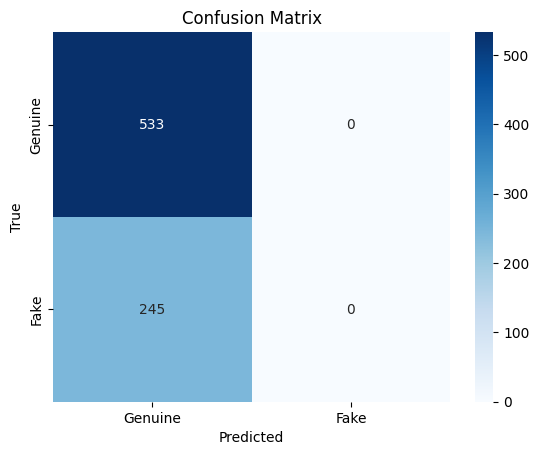

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Genuine", "Fake"], yticklabels=["Genuine", "Fake"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
# Get predicted probabilities for the entire validation set
all_probs = []
with torch.no_grad():
    for batch in val_loader:
        inputs = {key: val.to(model.device) for key, val in batch.items() if key != "labels"}
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)[:, 1].cpu().numpy()
        all_probs.extend(probs)  # Accumulate probabilities for all batches

# Calculate ROC-AUC using accumulated probabilities
roc_auc = roc_auc_score(true_labels, all_probs)
print(f"ROC-AUC: {roc_auc:.4f}")

ROC-AUC: 0.5580


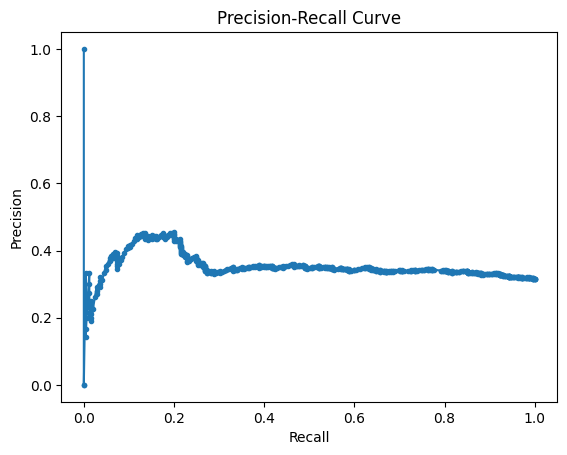

In [ ]:
from sklearn.metrics import precision_recall_curve

precision_curve, recall_curve, _ = precision_recall_curve(true_labels, all_probs)

plt.plot(recall_curve, precision_curve, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
import json
# Save metrics to a JSON file
metrics = {
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
    "roc_auc": roc_auc,
}

with open("evaluation_metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

    print("Metrics saved to evaluation_metrics.json")

Metrics saved to evaluation_metrics.json
